In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,export_graphviz

In [2]:
dt = pd.read_csv('train.csv')

In [3]:
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dt.shape

(889, 12)

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.5+ KB


In [6]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,889.0,446.000000,256.998173,1.00,224.0000,446.0000,668.0,891.0000
Survived,889.0,0.382452,0.486260,0.00,0.0000,0.0000,1.0,1.0000
Pclass,889.0,2.311586,0.834700,1.00,2.0000,3.0000,3.0,3.0000
Age,889.0,32.699854,14.346821,0.42,22.0000,32.0000,45.0,80.0000
SibSp,889.0,0.524184,1.103705,0.00,0.0000,0.0000,1.0,8.0000
Parch,889.0,0.382452,0.806761,0.00,0.0000,0.0000,0.0,6.0000
Fare,889.0,32.096681,49.697504,0.00,7.8958,14.4542,31.0,512.3292


In [7]:
le = LabelEncoder()
dt['Sex'] = le.fit_transform(dt['Sex'])

In [8]:
train_x = dt[['Sex','Age','Fare']]
train_y = dt['Survived']

In [9]:
model_score = []
for i in range(10,60):
    tree_model=DecisionTreeClassifier(max_depth=i)
    tree_model.fit(train_x,train_y)
    model_score.append(tree_model.score(train_x,train_y))

In [10]:
model_score.index(max(model_score))

11

In [11]:
tree_model=DecisionTreeClassifier(max_depth=22)
tree_model.fit(train_x,train_y)
tree_model.score(train_x,train_y)

0.9763779527559056

In [12]:
model_score = []
for i in range(5,50):
    tree_model=DecisionTreeClassifier(max_depth=22,max_leaf_nodes=i)
    tree_model.fit(train_x,train_y)
    model_score.append(tree_model.score(train_x,train_y))

In [13]:
model_score.index(max(model_score))

44

In [14]:
tree_model = DecisionTreeClassifier(max_depth=22, max_leaf_nodes=50)
tree_model.fit(train_x,train_y)
tree_model.score(train_x, train_y)

0.8818897637795275

In [15]:
with open("titanic_tree.dot",'w') as f:
    f = export_graphviz(tree_model, feature_names=['Sex','Age','Fare'], out_file=f)

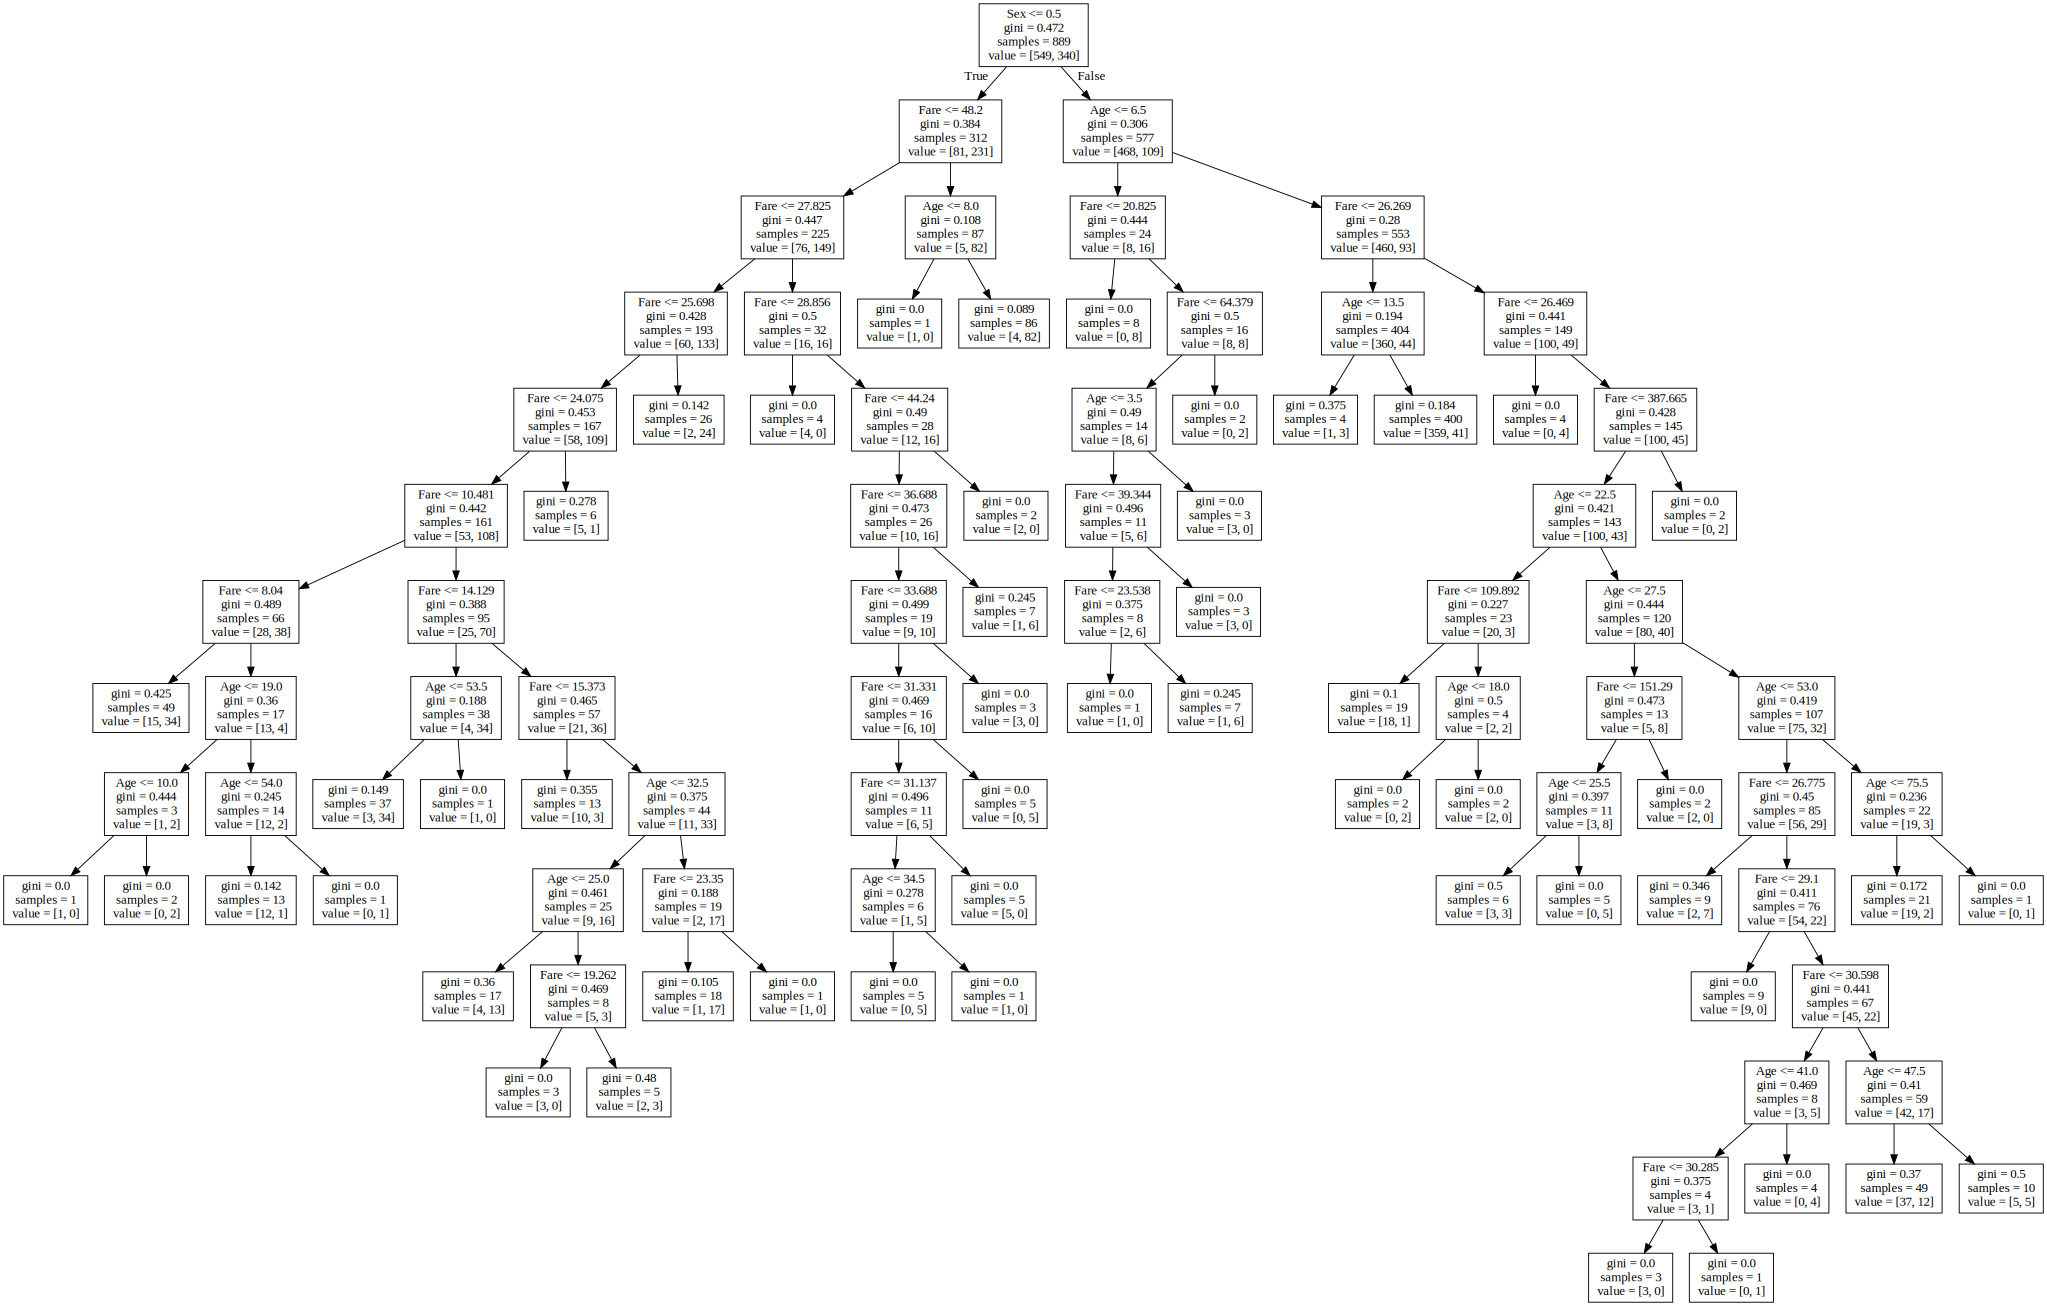

In [16]:
import graphviz
with open("titanic_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)